In [49]:
import pandas as pd
import numpy as np

# open df from csv
position_366096 = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_366096_LVR_17285193_17673993.csv')
position_453456 = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_453456_LVR_17285193_17673993.csv')
position_506262 = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_506262_LVR_17285193_17673993.csv')
range = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_LVR_17285193_17673993.csv')
# in range df if upper_price and lower_price are same, set both to NA
range.loc[range['upper_price'] == range['lower_price'], ['upper_price', 'lower_price']] = np.nan

In [59]:
# combine range, position_250274, position_515539, position_520645 on date
df = pd.merge(range, position_366096, on='date', how='left', suffixes=('', '_366096'))
df = pd.merge(df, position_453456, on='date', how='left', suffixes=('', '_453456'))
df = pd.merge(df, position_506262, on='date', how='left', suffixes=('', '_506262'))
combined_df = df

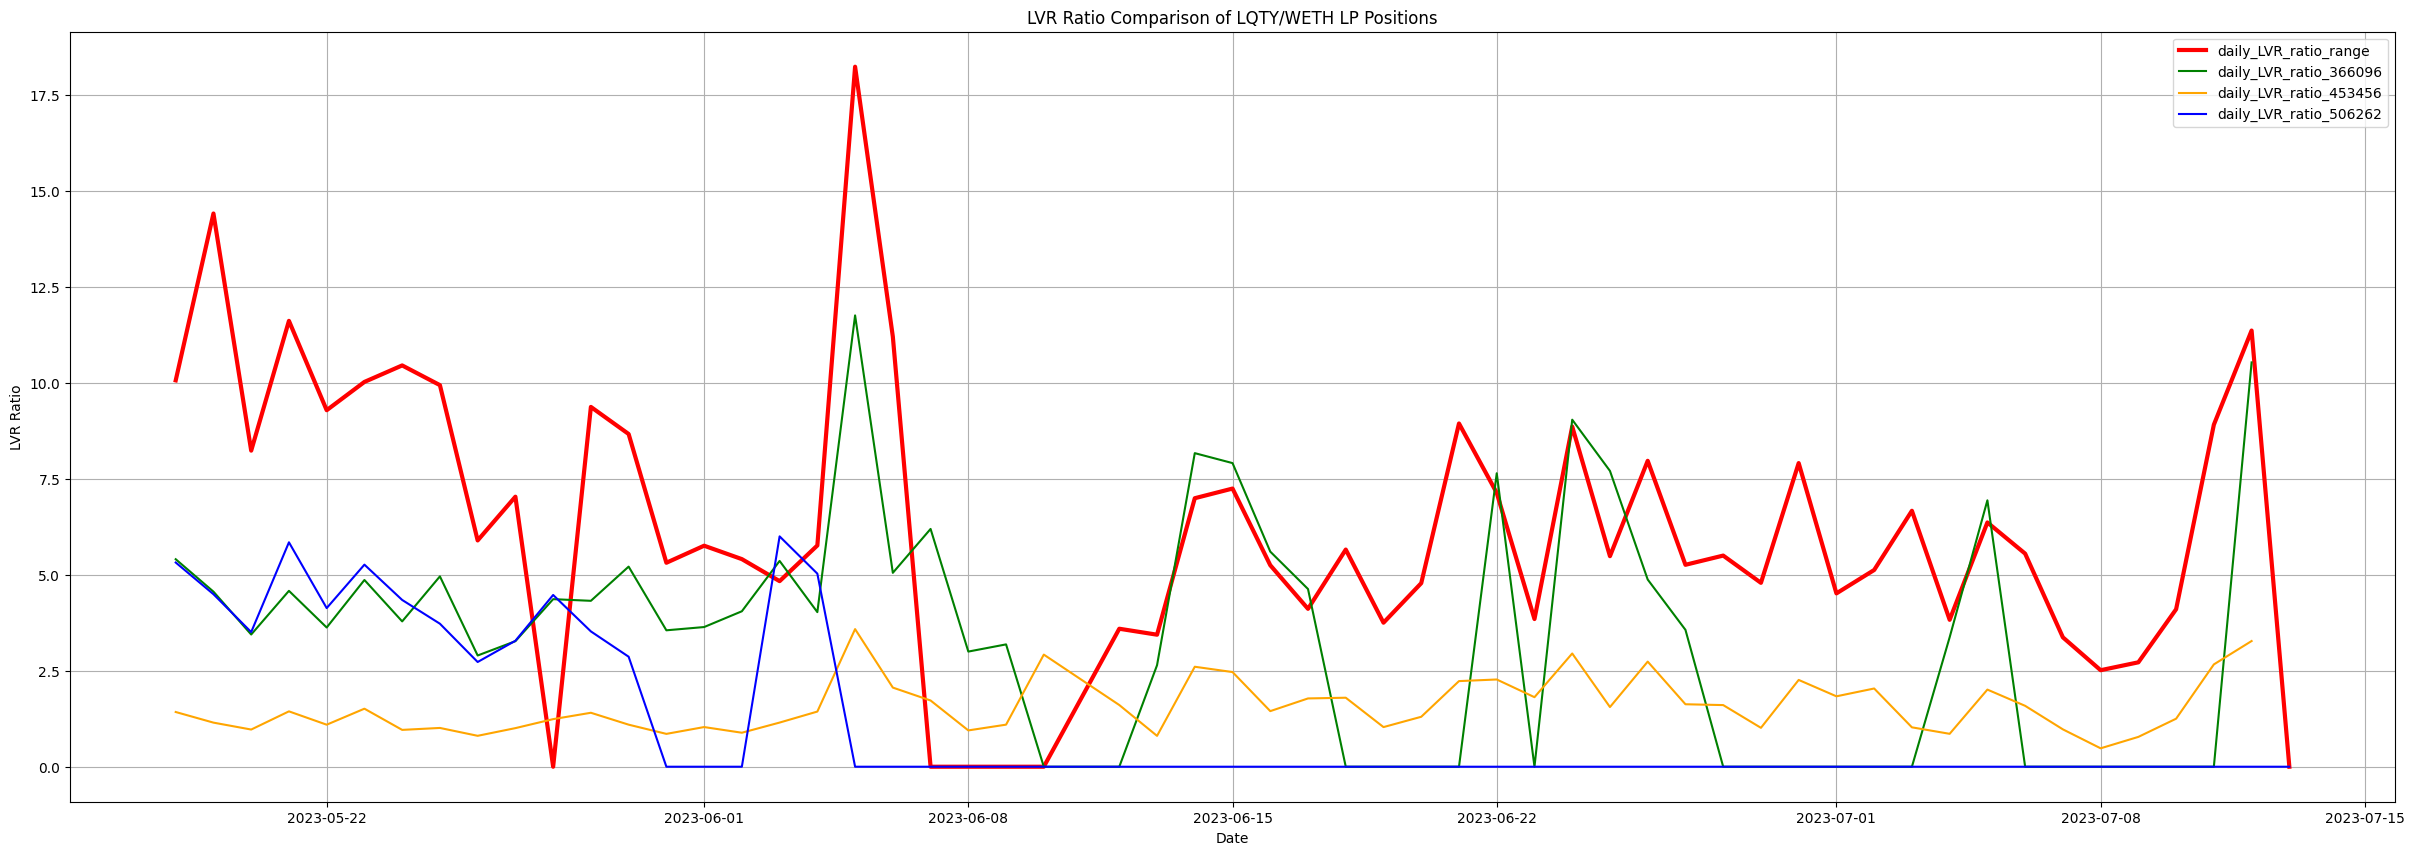

In [60]:
# plot date vs daily_LVR_ratio_range, daily_LVR_ratio_366096, daily_LVR_ratio_453456, daily_LVR_ratio_506262

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], combined_df['daily_LVR_ratio'], label='daily_LVR_ratio_range', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_366096'], label='daily_LVR_ratio_366096', color='green')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_453456'], label='daily_LVR_ratio_453456', color='orange')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_506262'], label='daily_LVR_ratio_506262', color='blue')

ax.set(xlabel='Date', ylabel='LVR Ratio', title='LVR Ratio Comparison of LQTY/WETH LP Positions')
ax.grid(True)
ax.legend()

plt.show()

In [53]:
position_366096.head()

,open_time,log_return,block,current_tick,upper_price,lower_price,current_price,amount0,amount1,timestamp,date,pool_value,token0_usd,token1_usd,daily_LVR_ratio,in_range,daily_LVR,cumulative_LVR,cumulative_LVR_USD,daily_LVR_USD
0,2023-05-18,5.086961,17285193,-72095,0.000832,0.0005,0.000740,537.473473,1.241787,1684397831000,2023-05-18,1.639407,1.34,1826.78,5.406141,True,0.000886,0.000886,1.619050,1.619050
1,2023-05-19,4.307170,17292393,-72238,0.000832,0.0005,0.000729,605.066667,1.192139,1684485419000,2023-05-19,1.633408,1.32,1807.44,4.561503,True,0.000745,0.001631,2.948596,1.346686
2,2023-05-20,3.255954,17299593,-72286,0.000832,0.0005,0.000726,627.863840,1.175553,1684573031000,2023-05-20,1.631255,1.31,1814.58,3.444489,True,0.000562,0.002193,3.979827,1.019584
3,2023-05-21,4.342572,17306793,-72408,0.000832,0.0005,0.000717,686.053500,1.133576,1684660523000,2023-05-21,1.625474,1.30,1815.23,4.582329,True,0.000745,0.002938,5.333319,1.352066
4,2023-05-22,3.443757,17313993,-72503,0.000832,0.0005,0.000710,731.611564,1.101065,1684748255000,2023-05-22,1.620670,1.29,1816.38,3.627392,True,0.000588,0.003526,6.404513,1.067814


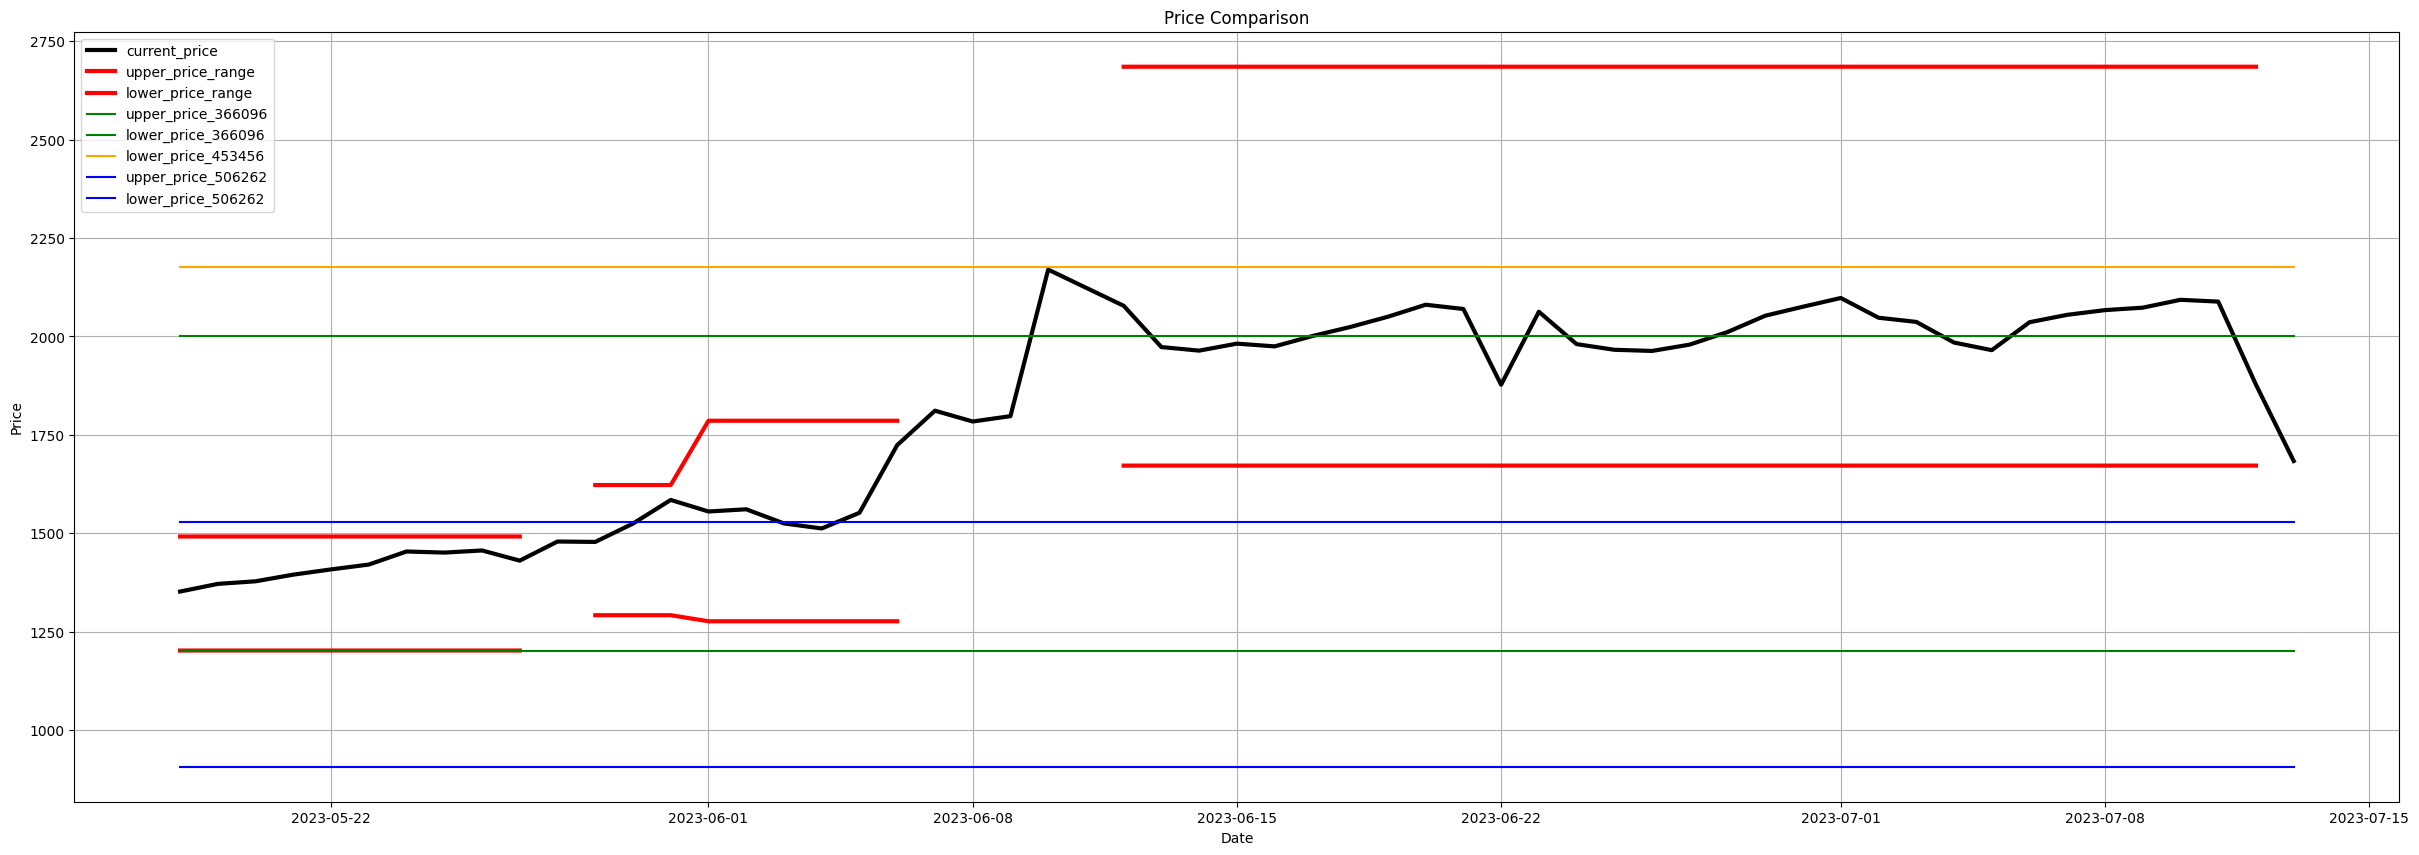

In [62]:
# plot date vs upper_price_range, lower_price_range, upper_price_366096, lower_price_366096, upper_price_453456, lower_price_453456, upper_price_506262, lower_price_506262

fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], 1/combined_df['current_price'], label='current_price',color='black', linewidth=3)
ax.plot(combined_df['date'], 1/combined_df['upper_price'], label='upper_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], 1/combined_df['lower_price'], label='lower_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], 1/combined_df['upper_price_366096'], label='upper_price_366096',color='green')
ax.plot(combined_df['date'], 1/combined_df['lower_price_366096'], label='lower_price_366096',color='green')
ax.plot(combined_df['date'], combined_df['upper_price'], label='upper_price_453456',color='orange')
ax.plot(combined_df['date'], 1/combined_df['lower_price_453456'], label='lower_price_453456',color='orange')
ax.plot(combined_df['date'], 1/combined_df['upper_price_506262'], label='upper_price_506262',color='blue')
ax.plot(combined_df['date'], 1/combined_df['lower_price_506262'], label='lower_price_506262',color='blue')

ax.set(xlabel='Date', ylabel='Price', title='Price Comparison')
ax.grid(True)
ax.legend()

plt.show()